# 5 {-}

## 5.2 {-}


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.dataset import random_split
from torchvision import datasets
from sklearn.metrics import confusion_matrix
import PIL

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [3]:
##Do Not Touch This Cell

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
if device =='cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")

Train on CPU...


In [4]:
##Do Not Touch This Cell
max_epochs = 50

random_seed = 671
torch.manual_seed(random_seed)

In [5]:
train_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
##TODO: Split the set into 80% train, 20% validation (there are 50K total images)
train_num = 40000
val_num = 10000
train_set, val_set = random_split(dataset, [train_num, val_num])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
loss_list, acc_list = [], []
loss_list_val, acc_list_val = [], []
criterion = nn.CrossEntropyLoss()

for epoch in range(max_epochs):
    #TODO: set the net to train mode:
    net.train()

    epoch_loss = 0.0
    correct = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)    

        optimizer.zero_grad()
        ##TODO: pass the data into the network and store the output
        output = net(data)

        ##TODO: Calculate the cross entropy loss between the output and target
        loss = criterion(output, labels) 
  
        ##TODO: Perform backpropagation
        loss.backward()
        optimizer.step()

        ##TODO: Get the prediction from the output
        preds = output.argmax(axis=1)
        
        ##TODO: Calculate the correct number and add the number to correct
        temp_cor = np.count_nonzero(labels - preds==0)
        correct += temp_cor

        ##TODO: Add the loss to epoch_loss.
        epoch_loss += loss #.item()

    ##TODO: calculate the average loss
    #avg_loss = epoch_loss/len(train_loader)
    avg_loss = epoch_loss/40000

    ##TODO: calculate the average accuracy
    #avg_acc = correct/(len(labels) * len(train_loader))
    avg_acc = correct/40000

    ##TODO: append average epoch loss to loss list
    loss_list.append(avg_loss)

    ##TODO: append average accuracy to accuracy list
    acc_list.append(avg_acc)

    # validation
    ##TODO: set the model to eval mode
    net.eval()

    with torch.no_grad():
        loss_val = 0.0
        correct_val = 0
        for batch_idx, (data, labels) in enumerate(val_loader):
            data, labels = data.to(device), labels.to(device)
            ##TODO: pass the data into the network and store the output
            output = net(data)

            ##TODO: Calculate the cross entropy loss between the output and target 
            loss = criterion(output, labels)

            ##TODO: Get the prediction from the output
            _,preds = torch.max(output.data, 1)

            ##TODO: Calculate the correct number and add the number to correct_val
            correct_val += (preds == labels).sum().item()

            ##TODO: Add the loss to loss_val
            loss_val += loss

        ##TODO: calculate the average loss of validation
        avg_loss_val = loss_val/10000

        ##TODO: calculate the average accuracy of validation
        avg_acc_val = correct_val/10000

        ##TODO: append average epoch loss to loss list of validation
        loss_list_val.append(avg_loss_val)

        ##TODO: append average accuracy to accuracy list of validation
        acc_list_val.append(avg_acc_val)

    print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.01562 accuracy: 0.2737 val loss: 0.01356 val accuracy: 0.3622
[epoch 2] loss: 0.01228 accuracy: 0.4197 val loss: 0.01222 val accuracy: 0.4309
[epoch 3] loss: 0.01096 accuracy: 0.4912 val loss: 0.01091 val accuracy: 0.5099
[epoch 4] loss: 0.01022 accuracy: 0.5332 val loss: 0.01033 val accuracy: 0.5298
[epoch 5] loss: 0.00971 accuracy: 0.5579 val loss: 0.01004 val accuracy: 0.5465
[epoch 6] loss: 0.00931 accuracy: 0.5786 val loss: 0.00995 val accuracy: 0.5652
[epoch 7] loss: 0.00897 accuracy: 0.5954 val loss: 0.00923 val accuracy: 0.5867
[epoch 8] loss: 0.00866 accuracy: 0.6098 val loss: 0.00915 val accuracy: 0.5899
[epoch 9] loss: 0.00839 accuracy: 0.6216 val loss: 0.00915 val accuracy: 0.5926
[epoch 10] loss: 0.00817 accuracy: 0.6301 val loss: 0.00872 val accuracy: 0.6126
[epoch 11] loss: 0.00796 accuracy: 0.6413 val loss: 0.00880 val accuracy: 0.6101
[epoch 12] loss: 0.00771 accuracy: 0.6536 val loss: 0.00830 val accuracy: 0.6332
[epoch 13] loss: 0.00753 accuracy: 0.

## 5.2 {-}

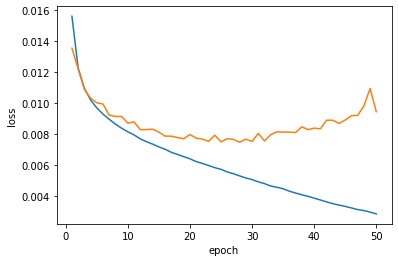

In [29]:
x = range(1,51)
loss_list1 = [l.item() for l in loss_list] 
loss_list_val1 = [l.item() for l in loss_list_val] 

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(x, loss_list1)
plt.plot(x, loss_list_val1)


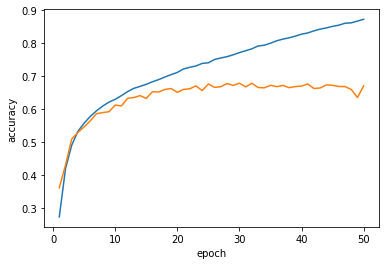

In [30]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(x, acc_list)
plt.plot(x, acc_list_val)


## 5.3 {-}

In [37]:
#Test
true_labels = []
predictions = []
correct_test = 0
net.eval()
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        ##TODO: pass the data into the network and store the output
        output = net(data)

        ##TODO: Get the prediction from the output
        _,preds = torch.max(output.data, 1)
        #print(preds)
        #print(label)
        #break


        ##TODO: Calculate the correct number and add the number to correct_test
        correct_test += (preds == label).sum().item()

        ##TODO: update predictions list and true label list
        ##We can directly append the value because here batch_size=1
        true_labels.append(label[0].item())
        predictions.append(output.argmax(axis=1).item())





print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct_test / len(test_set)))

Accuracy on the 10000 test images: 66.97 %


In [40]:
conf_mat = confusion_matrix(true_labels, predictions)
conf_mat

array([[717,  29,  74,  16,  21,   9,  17,  17,  47,  53],
       [ 20, 787,  10,   7,   9,   5,  19,   4,  27, 112],
       [ 64,  11, 579,  38,  74,  60,  95,  51,   9,  19],
       [ 37,  19,  86, 366,  89, 158, 151,  54,  15,  25],
       [ 31,   5, 102,  37, 601,  31, 119,  66,   3,   5],
       [ 19,   8,  82, 133,  59, 527,  77,  81,   6,   8],
       [  5,   6,  51,  24,  27,  14, 858,   8,   5,   2],
       [ 20,   7,  48,  39,  61,  47,  24, 733,   4,  17],
       [102,  49,  28,  13,   8,   3,   8,   2, 738,  49],
       [ 31,  88,   8,  10,  13,   4,  14,  22,  19, 791]])

From the confusion matrix the we see that class 4 and class 6 were the two most misclassified images. This makes sense because class 4 is cats and clas 6 is dogs and these animals look very similar and have very similar features which will result in mislabeling.